In [34]:
import numpy as np 
import pandas as pd

train = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
store = pd.read_csv('stores.csv')

df = train.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')
df = df.merge(store, on=['Store'], how='left')

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [35]:
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by=['Store','Dept','Date'], inplace = True)

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [36]:
df.columns.tolist()

['Store',
 'Dept',
 'Date',
 'Weekly_Sales',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Type',
 'Size']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [38]:
numerics = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment' ]

categorics = ['Store','Dept','IsHoliday','Type','Size']

markdowns = [ 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'] 

df[markdowns] = df[markdowns].fillna(0)

def groupwise_interpolation(group):

    group = group.set_index('Date')

    group[numerics] = group[numerics].interpolate(method='time', limit_direction = 'both')

    group[categorics] = group[categorics].ffill().bfill()

    return group.reset_index()

df = df.groupby(['Store','Dept'], group_keys=False).apply(groupwise_interpolation)

df.head()

/tmp/ipykernel_2533647/2624615580.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['Store','Dept'], group_keys=False).apply(groupwise_interpolation)


,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,2010-02-05,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,2010-02-12,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,2010-02-19,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,2010-02-26,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,2010-03-05,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [39]:
df.isna().sum()

Date            0
Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [40]:
df['IsHoliday'] = df['IsHoliday'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 134
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          421570 non-null  datetime64[ns]
 1   Store         421570 non-null  int64         
 2   Dept          421570 non-null  int64         
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421570 non-

In [41]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

df.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_B,Type_C
0,2010-02-05,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,False,False
1,2010-02-12,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,False,False
2,2010-02-19,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,False,False
3,2010-02-26,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,False,False
4,2010-03-05,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,False,False


In [42]:
df['Type_B'] = df['Type_B'].astype(int)
df['Type_C'] = df['Type_C'].astype(int)
df.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_B,Type_C
0,2010-02-05,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,0,0
1,2010-02-12,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,0,0
2,2010-02-19,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,0,0
3,2010-02-26,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,0,0
4,2010-03-05,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,0,0


In [45]:
for lags in [1,2,4,52]:
    df[f'Lag_no_{lags}'] = df.groupby(['Store','Dept'])['Weekly_Sales'].shift(lags).ffill().bfill()

for rolling_window in [2,4]:
    df[f'Rolling_window_MA_{rolling_window}'] = df.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(rolling_window).mean()).ffill().bfill()
    df[f'Rolling_window_std_{rolling_window}'] = df.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(rolling_window).std()).ffill().bfill()

df.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type_B,Type_C,Lag_no_2,Lag_no_4,Lag_no_52,Rolling_window_MA_2,Rolling_window_std_2,Rolling_window_MA_4,Rolling_window_std_4,Lag_no_1
0,2010-02-05,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0,0,24924.50,24924.5,24924.5,35481.995,14930.552614,32990.77,12832.106391,24924.50
1,2010-02-12,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,0,0,24924.50,24924.5,24924.5,35481.995,14930.552614,32990.77,12832.106391,24924.50
2,2010-02-19,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,0,0,24924.50,24924.5,24924.5,43817.520,3142.340109,32990.77,12832.106391,46039.49
3,2010-02-26,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,0,0,46039.49,24924.5,24924.5,30499.545,15692.120759,32990.77,12832.106391,41595.55
4,2010-03-05,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,0,0,41595.55,24924.5,24924.5,20615.720,1714.281396,32216.62,13554.047185,19403.54


In [48]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.day_of_week
df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)
df['IsYearEnd'] = df['Date'].dt.is_year_end.astype(int)
df['IsMonthEnd'] = df['Date'].dt.is_month_end.astype(int)
df['WeekofYear'] = df['Date'].dt.isocalendar().week.astype(int)

df.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Rolling_window_std_4,Lag_no_1,Day,Month,Year,DayOfWeek,IsWeekend,IsYearEnd,IsMonthEnd,WeekofYear
0,2010-02-05,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,12832.106391,24924.50,5,2,2010,4,0,0,0,5
1,2010-02-12,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,12832.106391,24924.50,12,2,2010,4,0,0,0,6
2,2010-02-19,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,12832.106391,46039.49,19,2,2010,4,0,0,0,7
3,2010-02-26,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,12832.106391,41595.55,26,2,2010,4,0,0,0,8
4,2010-03-05,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,13554.047185,19403.54,5,3,2010,4,0,0,0,9


In [49]:
for window in [5,7]:
    df[f'Rolling_window_MA{window}'] = df.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x:x.rolling(window).mean()).ffill().bfill()
df.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Day,Month,Year,DayOfWeek,IsWeekend,IsYearEnd,IsMonthEnd,WeekofYear,Rolling_window_MA5,Rolling_window_MA7
0,2010-02-05,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,5,2,2010,4,0,0,0,5,30758.196,28138.715714
1,2010-02-12,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,12,2,2010,4,0,0,0,6,30758.196,28138.715714
2,2010-02-19,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,19,2,2010,4,0,0,0,7,30758.196,28138.715714
3,2010-02-26,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,26,2,2010,4,0,0,0,8,30758.196,28138.715714
4,2010-03-05,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,5,3,2010,4,0,0,0,9,30758.196,28138.715714


In [51]:
global_min = df['Weekly_Sales'].min()
global_max = df['Weekly_Sales'].max()

print(f'Global max : {global_max}, Global_min : {global_min}')

groupwise_stats = df.groupby(['Store','Dept'])['Weekly_Sales'].agg(['min','max']).reset_index()

print(f'Group_wise Stats \n {groupwise_stats}')

Global max : 693099.36, Global_min : -4988.94
Group_wise Stats 
       Store  Dept       min       max
0         1     1  14537.37  57592.12
1         1     2  35819.83  65615.36
2         1     3   6165.73  51159.17
3         1     4  32497.43  47893.23
4         1     5  11570.27  85676.09
...     ...   ...       ...       ...
3326     45    94      0.98   7639.88
3327     45    95  41131.42  75204.77
3328     45    96      2.94      3.00
3329     45    97   4935.60   8765.09
3330     45    98      2.00   1504.71

[3331 rows x 4 columns]


In [52]:
sizes = df.groupby(['Store','Dept']).size().reset_index(name='length')

print(sizes)

      Store  Dept  length
0         1     1     143
1         1     2     143
2         1     3     143
3         1     4     143
4         1     5     143
...     ...   ...     ...
3326     45    94     134
3327     45    95     143
3328     45    96       2
3329     45    97     143
3330     45    98     135

[3331 rows x 3 columns]


In [53]:
correlation = df.corr()

print(correlation['Weekly_Sales'].sort_values(ascending=False))

Weekly_Sales            1.000000
Rolling_window_MA_2     0.982488
Rolling_window_MA_4     0.961856
Rolling_window_MA5      0.956106
Lag_no_1                0.945140
Rolling_window_MA7      0.940867
Lag_no_2                0.928280
Lag_no_4                0.917785
Lag_no_52               0.771486
Rolling_window_std_4    0.481245
Rolling_window_std_2    0.448148
Size                    0.243828
Dept                    0.148032
MarkDown5               0.050465
MarkDown1               0.047172
MarkDown3               0.038562
MarkDown4               0.037467
Month                   0.028409
WeekofYear              0.027673
MarkDown2               0.020716
IsHoliday               0.012774
Fuel_Price             -0.000120
Date                   -0.000663
Temperature            -0.002312
Day                    -0.006187
IsYearEnd              -0.008280
IsMonthEnd             -0.009319
Year                   -0.010111
CPI                    -0.020921
Unemployment           -0.025864
Store     

In [54]:
df.columns.tolist()

['Date',
 'Store',
 'Dept',
 'Weekly_Sales',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Size',
 'Type_B',
 'Type_C',
 'Lag_no_2',
 'Lag_no_4',
 'Lag_no_52',
 'Rolling_window_MA_2',
 'Rolling_window_std_2',
 'Rolling_window_MA_4',
 'Rolling_window_std_4',
 'Lag_no_1',
 'Day',
 'Month',
 'Year',
 'DayOfWeek',
 'IsWeekend',
 'IsYearEnd',
 'IsMonthEnd',
 'WeekofYear',
 'Rolling_window_MA5',
 'Rolling_window_MA7']

In [55]:
features = ['Store','Dept','IsHoliday','Temperature',
            'Fuel_Price','MarkDown1','MarkDown2','MarkDown3',
            'MarkDown4','MarkDown5','CPI','Unemployment','Size',
            'Type_B','Type_C','Lag_no_2','Lag_no_4','Lag_no_52','Rolling_window_MA_2',
            'Rolling_window_std_2','Rolling_window_MA_4','Rolling_window_std_4','Lag_no_1',
            'Day','Month','Year','DayOfWeek','IsWeekend','IsYearEnd','IsMonthEnd','WeekofYear',
            'Rolling_window_MA5','Rolling_window_MA7']

split_date = '2012-01-01'

train_df = df[df['Date'] < split_date]
test_df = df[df['Date'] >= split_date]

X_train = train_df[features]
y_train = train_df['Weekly_Sales']

X_test = test_df[features]
y_test = test_df['Weekly_Sales']

X_train = X_train.iloc[:-1]
y_train = y_train.iloc[1:]

X_test = X_test.iloc[:-1]
y_test = y_test.iloc[1:]

X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

print(X_train.info())
print(y_train.info())

print(X_test.info())
print(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 294131 entries, 0 to 90
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Store                 294131 non-null  float64
 1   Dept                  294131 non-null  float64
 2   IsHoliday             294131 non-null  float64
 3   Temperature           294131 non-null  float64
 4   Fuel_Price            294131 non-null  float64
 5   MarkDown1             294131 non-null  float64
 6   MarkDown2             294131 non-null  float64
 7   MarkDown3             294131 non-null  float64
 8   MarkDown4             294131 non-null  float64
 9   MarkDown5             294131 non-null  float64
 10  CPI                   294131 non-null  float64
 11  Unemployment          294131 non-null  float64
 12  Size                  294131 non-null  float64
 13  Type_B                294131 non-null  float64
 14  Type_C                294131 non-null  float64
 15  Lag_no_2 

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Shape of X_train: {X_train_scaled.shape} \n, Shape of y_train: {y_train.shape} \n, Shape of X_test: {X_test_scaled.shape} \n, Shape of y_test: {y_test.shape}')

Shape of X_train: (294131, 33) 
, Shape of y_train: (294131,) 
, Shape of X_test: (127437, 33) 
, Shape of y_test: (127437,)


In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are already defined
# Replace these with your actual data preparation steps

# Step 1: Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Step 2: Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Objective function for regression
    'max_depth': 6,                   # Maximum depth of a tree
    'learning_rate': 0.1,             # Learning rate (eta)
    'n_estimators': 100,              # Number of boosting rounds
    'subsample': 0.8,                 # Subsample ratio of the training instance
    'colsample_bytree': 0.8,          # Subsample ratio of columns when constructing each tree
    'seed': 42                        # Random seed for reproducibility
}

# Step 3: Train the XGBoost model
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)


In [64]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error

bayes_model = BayesianRidge()

bayes_model.fit(X_train_scaled, y_train)

y_pred_train = bayes_model.predict(X_train_scaled)
y_pred_test = bayes_model.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test =  mean_absolute_error(y_test, y_pred_test)

print(f'Training MSE: {mse_train}, Training MAE: {mae_train}, Testing MSE: {mse_test}, Testing MAE: {mae_test}')

Training MSE: 57385690.94520488, Training MAE: 2550.2984501345545, Testing MSE: 33753929.94622389, Testing MAE: 2826.003315636813


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)

y_pred_train_l = linear_model.predict(X_train_scaled)
y_pred_test_l = linear_model.predict(X_test_scaled)

mse_train_l = mean_squared_error(y_train, y_pred_train_l)
mse_test_l = mean_squared_error(y_test, y_pred_test_l)

mae_train_l = mean_absolute_error(y_train, y_pred_train_l)
mae_test_l =  mean_absolute_error(y_test, y_pred_test_l)

print(f'Training MSE: {mse_train_l}, Training MAE: {mae_train_l}, Testing MSE: {mse_test_l}, Testing MAE: {mae_test_l}')

Training MSE: 57384725.22503581, Training MAE: 2551.9213746968644, Testing MSE: 33870305.97025346, Testing MAE: 2833.817957007095


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

rf_model = RandomForestRegressor()

rf_model.fit(X_train_scaled, y_train)

y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf =  mean_absolute_error(y_test, y_pred_test_rf)

print(f'Training MSE: {mse_train_rf}, Training MAE: {mae_train_rf}, Testing MSE: {mse_test_rf}, Testing MAE: {mae_test_rf}')

Training MSE: 4542028.234779336, Training MAE: 688.973989030738, Testing MSE: 36901341.57699766, Testing MAE: 2590.3517964225466


In [93]:
# Copying the feature data
train_df = X_train.reset_index(drop=True)  # Reset index to avoid alignment issues
test_df = X_test.reset_index(drop=True)

# Resetting index of target variables to align correctly with features
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Adding the target and predicted values to the training DataFrame
train_df['Actual Sales'] = y_train
train_df['Predicted Sales Bayesian'] = y_pred_train
train_df['Predicted Sales Linear'] = y_pred_train_l
train_df['Predicted Sales RF'] = y_pred_train_rf
train_df['Date'] = X_train.index  # Add the original date index if needed for plotting

# Adding the target and predicted values to the test DataFrame
test_df['Actual Sales'] = y_test
test_df['Predicted Sales Bayesian'] = y_pred_test
test_df['Predicted Sales Linear'] = y_pred_test_l
test_df['Predicted Sales RF'] = y_pred_test_rf
test_df['Date'] = X_test.index  # Add the original date index if needed for plotting

# Aggregating by date to get sum of actual and predicted sales
aggregated_train = train_df.groupby('Date').agg({
    'Actual Sales': 'sum',
    'Predicted Sales Bayesian': 'sum',
    'Predicted Sales Linear': 'sum',
    'Predicted Sales RF': 'sum',
}).reset_index()

aggregated_test = test_df.groupby('Date').agg({
    'Actual Sales': 'sum',
    'Predicted Sales Bayesian': 'sum',
    'Predicted Sales Linear': 'sum',
    'Predicted Sales RF': 'sum',
}).reset_index()

# Printing the aggregated data for debugging purposes
print(aggregated_train.head())
print(aggregated_test.head())

   Date  Actual Sales  Predicted Sales Bayesian  Predicted Sales Linear  \
0     0   48998334.78              4.886610e+07            4.911176e+07   
1     1   48624560.57              4.848542e+07            4.860670e+07   
2     2   44076597.69              4.959623e+07            4.982555e+07   
3     3   47245843.87              4.725035e+07            4.748211e+07   
4     4   45997798.47              4.616685e+07            4.599311e+07   

   Predicted Sales RF  
0        5.175305e+07  
1        4.839359e+07  
2        4.493948e+07  
3        4.725749e+07  
4        4.604239e+07  
   Date  Actual Sales  Predicted Sales Bayesian  Predicted Sales Linear  \
0     0     141294.90             289114.743474           289029.726392   
1     1      95540.63              88413.743767            88340.370796   
2     2     106684.71             125546.794659           125548.750859   
3     3     139468.35             -42913.470438           -43380.168490   
4     4     118680.11         

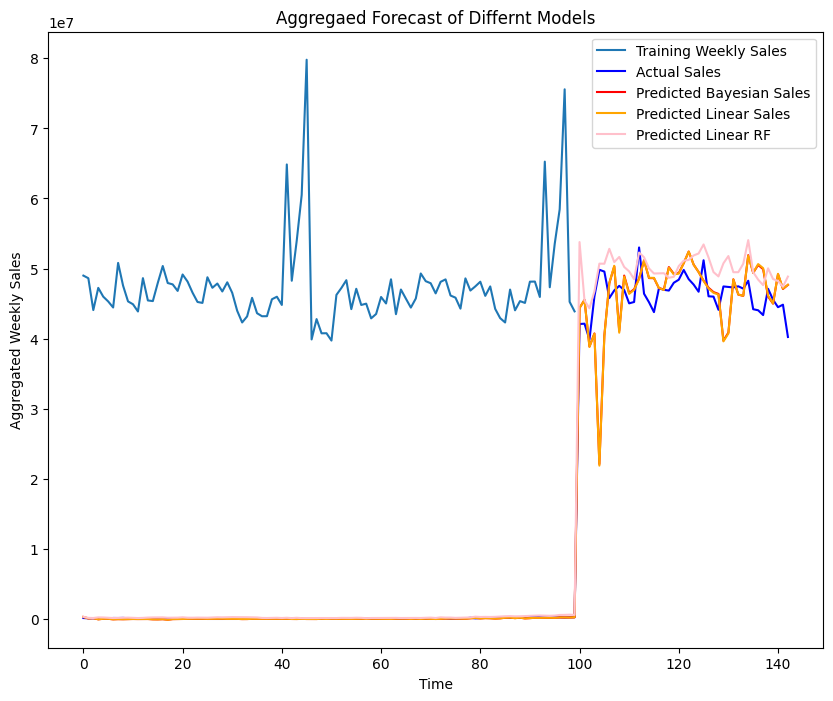

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.plot(aggregated_train['Date'], aggregated_train['Actual Sales'], label = 'Training Weekly Sales')

plt.plot(aggregated_test['Date'], aggregated_test['Actual Sales'], color='blue', label = 'Actual Sales')

plt.plot(aggregated_test['Date'], aggregated_test['Predicted Sales Bayesian'], color= 'red', label = 'Predicted Bayesian Sales')

plt.plot(aggregated_test['Date'], aggregated_test['Predicted Sales Linear'], color= 'orange', label = 'Predicted Linear Sales')

plt.plot(aggregated_test['Date'], aggregated_test['Predicted Sales RF'], color= 'pink', label = 'Predicted Linear RF')

plt.title('Aggregaed Forecast of Differnt Models')

plt.xlabel('Time')

plt.ylabel('Aggregated Weekly Sales')

plt.legend()

plt.show()

In [74]:
train_df = X_train.reset_index(drop=True)
train_df['Actual_Sales'] = y_train
train_df['Predicted_Sales_B'] = y_pred_train
train_df['Predicted_Sales_L'] = y_pred_train_l
train_df['Date'] = X_train.index

test_df = X_test.reset_index(drop=True)
test_df['Actual_Sales'] = y_test
test_df['Predicted_Sales_B'] = y_pred_test
test_df['Predicted_Sales_L'] = y_pred_test_l
test_df['Date'] = X_test.index

In [75]:
aggregated_train_1 = train_df.groupby('Date').agg({'Actual_Sales':'sum', 'Predicted_Sales_B':'sum', 'Predicted_Sales_L':'sum'}).reset_index()
aggregated_test_1 = test_df.groupby('Date').agg({'Actual_Sales':'sum', 'Predicted_Sales_B':'sum', 'Predicted_Sales_L':'sum'}).reset_index()

print(aggregated_train_1.head())
print(aggregated_test_1.head())

   Date  Actual_Sales  Predicted_Sales_B  Predicted_Sales_L
0     0   48998334.78       4.886610e+07       4.911176e+07
1     1   48624560.57       4.848542e+07       4.860670e+07
2     2   44076597.69       4.959623e+07       4.982555e+07
3     3   47245843.87       4.725035e+07       4.748211e+07
4     4   45997798.47       4.616685e+07       4.599311e+07
   Date  Actual_Sales  Predicted_Sales_B  Predicted_Sales_L
0     0     141294.90      289114.743474      289029.726392
1     1      95540.63       88413.743767       88340.370796
2     2     106684.71      125546.794659      125548.750859
3     3     139468.35      -42913.470438      -43380.168490
4     4     118680.11       31794.773435       31038.194213


In [78]:
correlation_matrix = df.corr()
print(correlation_matrix['Weekly_Sales'].sort_values(ascending=False))


Weekly_Sales            1.000000
Rolling_window_MA_2     0.982488
Rolling_window_MA_4     0.961856
Rolling_window_MA5      0.956106
Lag_no_1                0.945140
Rolling_window_MA7      0.940867
Lag_no_2                0.928280
Lag_no_4                0.917785
Lag_no_52               0.771486
Rolling_window_std_4    0.481245
Rolling_window_std_2    0.448148
Size                    0.243828
Dept                    0.148032
MarkDown5               0.050465
MarkDown1               0.047172
MarkDown3               0.038562
MarkDown4               0.037467
Month                   0.028409
WeekofYear              0.027673
MarkDown2               0.020716
IsHoliday               0.012774
Fuel_Price             -0.000120
Date                   -0.000663
Temperature            -0.002312
Day                    -0.006187
IsYearEnd              -0.008280
IsMonthEnd             -0.009319
Year                   -0.010111
CPI                    -0.020921
Unemployment           -0.025864
Store     

<Figure size 1000x800 with 0 Axes>

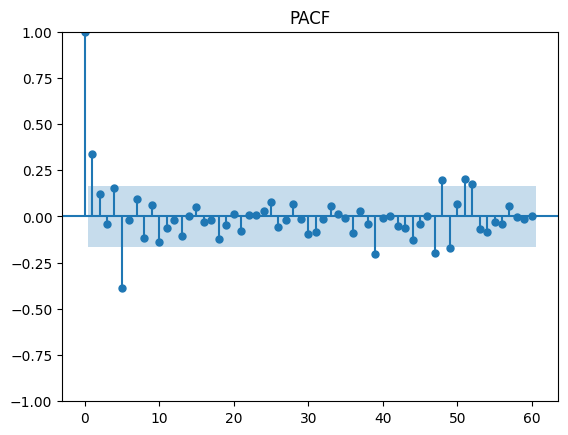

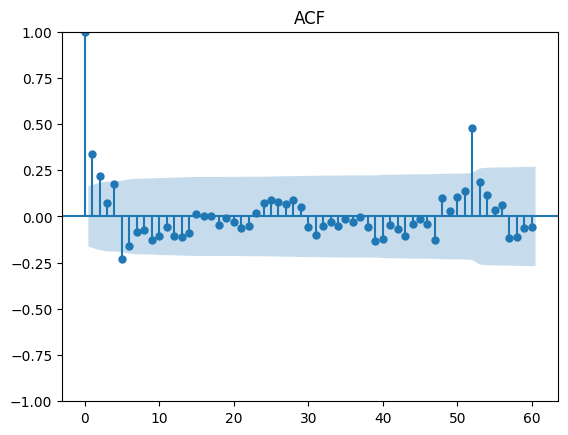

In [79]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plt.figure(figsize=(10,8))
plot_pacf(df.groupby('Date')['Weekly_Sales'].sum(), lags=60, title='PACF')
plot_acf(df.groupby('Date')['Weekly_Sales'].sum(), lags=60, title='ACF')
plt.show()

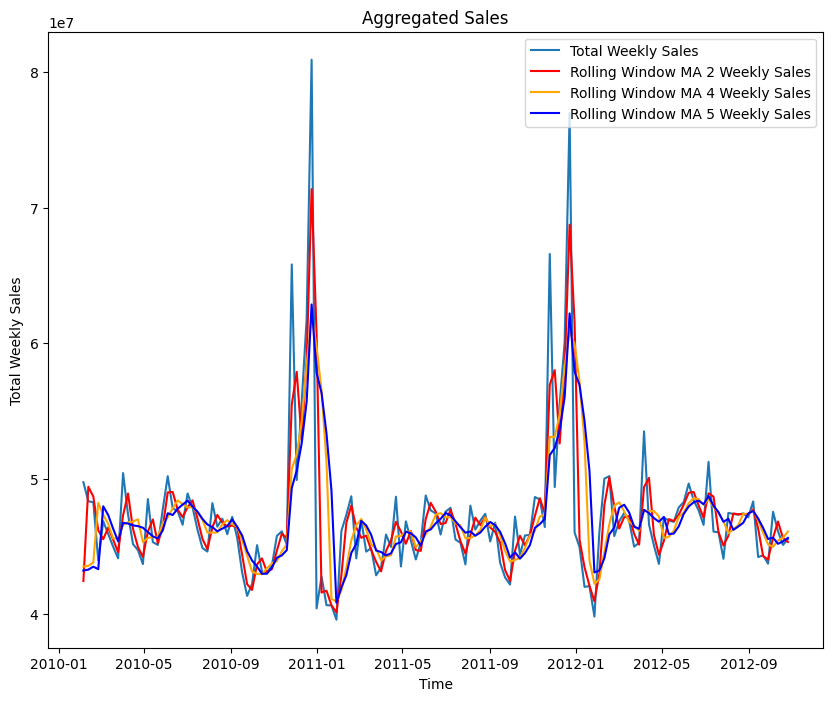

In [84]:
plt.figure(figsize=(10,8))
plt.plot(df.groupby('Date')['Weekly_Sales'].sum(), label='Total Weekly Sales')
plt.plot(df.groupby('Date')['Rolling_window_MA_2'].sum(),color='red', label='Rolling Window MA 2 Weekly Sales')
plt.plot(df.groupby('Date')['Rolling_window_MA_4'].sum(), color='orange', label='Rolling Window MA 4 Weekly Sales')
plt.plot(df.groupby('Date')['Rolling_window_MA5'].sum(), color = 'blue', label='Rolling Window MA 5 Weekly Sales')
plt.title('Aggregated Sales')
plt.xlabel('Time')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.show()


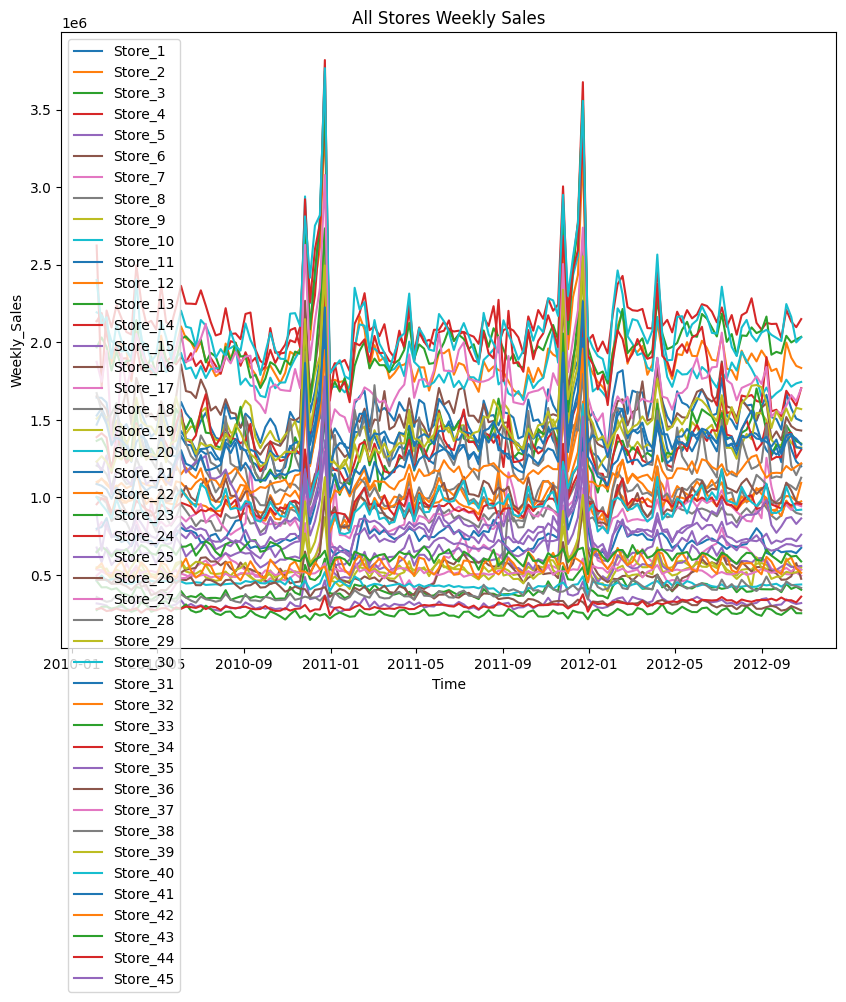

In [83]:
plt.figure(figsize=(10,8))

for store_id in df['Store'].unique():

    store_df = df[df['Store']==store_id]
    store_df = store_df.set_index('Date')
    plt.plot(store_df.groupby('Date')['Weekly_Sales'].sum(), label = f'Store_{store_id}')

plt.title('All Stores Weekly Sales')
plt.xlabel('Time')
plt.ylabel('Weekly_Sales')
plt.legend(loc='upper left')
plt.show()

In [87]:
aggregated_df = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
aggregated_df['Date'] = pd.to_datetime(aggregated_df['Date'])
aggregated_df = aggregated_df.set_index('Date')
aggregated_df.head()

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


In [88]:
Q1 = aggregated_df['Weekly_Sales'].quantile(0.25)
Q3 = aggregated_df['Weekly_Sales'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

iqr_otlier_dates = aggregated_df[(aggregated_df['Weekly_Sales'] < lower_bound)| (aggregated_df['Weekly_Sales'] > upper_bound)].index
print(iqr_otlier_dates)

DatetimeIndex(['2010-11-26', '2010-12-10', '2010-12-17', '2010-12-24',
               '2010-12-31', '2011-01-28', '2011-11-25', '2011-12-09',
               '2011-12-16', '2011-12-23', '2012-01-27', '2012-04-06'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [104]:
group = ['Store','Dept']
grouped = df.groupby(group)

iqr = []

for group_idx, group_data in grouped:
    group_data = group_data.set_index('Date')
    Q1 = group_data['Weekly_Sales'].quantile(0.25)
    Q3 = group_data['Weekly_Sales'].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    iqr_dates = group_data[(group_data['Weekly_Sales'] < lower_bound) | (group_data['Weekly_Sales'] > upper_bound)].index

    iqr.append(iqr_dates)

print(iqr)

[DatetimeIndex(['2010-02-12', '2010-02-19', '2010-04-02', '2010-04-09',
               '2010-10-29', '2010-11-05', '2010-12-17', '2010-12-24',
               '2011-02-11', '2011-02-18', '2011-04-22', '2011-04-29',
               '2011-11-04', '2011-12-09', '2011-12-16', '2011-12-23',
               '2012-02-10', '2012-02-17', '2012-04-06', '2012-04-13'],
              dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2010-12-24', '2010-12-31', '2011-03-04', '2011-12-23',
               '2012-02-03'],
              dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2010-07-30', '2010-08-06', '2010-08-13', '2010-08-20',
               '2010-08-27', '2010-09-03', '2011-07-29', '2011-08-05',
               '2011-08-12', '2011-08-19', '2011-08-26', '2011-09-02',
               '2012-07-20', '2012-07-27', '2012-08-03', '2012-08-10',
               '2012-08-17', '2012-08-24', '2012-08-31'],
              dtype='datetime64[ns]', name='Date', freq=None), DatetimeInd

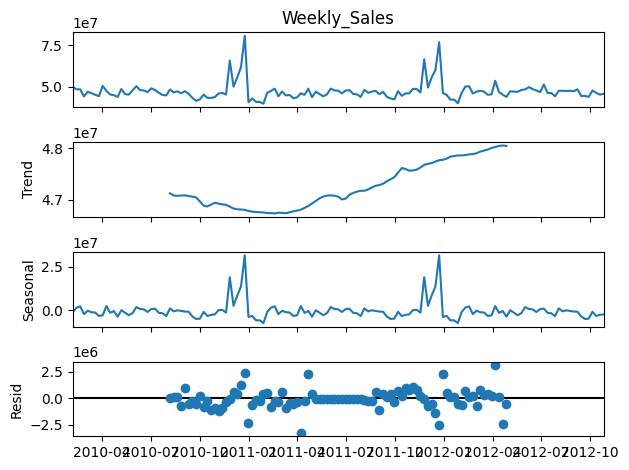

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(aggregated_df['Weekly_Sales'], model = 'additive')

decomposition.plot()
plt.show()

In [95]:
groupwise_stats1 = df.groupby(['Store', 'Dept'])['Weekly_Sales'].agg(['max','min']).reset_index()
print(groupwise_stats1)

      Store  Dept       max       min
0         1     1  57592.12  14537.37
1         1     2  65615.36  35819.83
2         1     3  51159.17   6165.73
3         1     4  47893.23  32497.43
4         1     5  85676.09  11570.27
...     ...   ...       ...       ...
3326     45    94   7639.88      0.98
3327     45    95  75204.77  41131.42
3328     45    96      3.00      2.94
3329     45    97   8765.09   4935.60
3330     45    98   1504.71      2.00

[3331 rows x 4 columns]


In [96]:
sizes = df.groupby(['Store','Dept']).size().reset_index(name='length')
print(sizes)

      Store  Dept  length
0         1     1     143
1         1     2     143
2         1     3     143
3         1     4     143
4         1     5     143
...     ...   ...     ...
3326     45    94     134
3327     45    95     143
3328     45    96       2
3329     45    97     143
3330     45    98     135

[3331 rows x 3 columns]


In [100]:
groups = ['Store','Dept']

grouped = df.groupby(groups)

train_list_1 = []
test_list_1 = []

for group_name,group_data in grouped:

    group_data = group_data.set_index('Date')
    group_data = group_data.sort_index()

    split_index = int(len(group_data)*0.8)

    train_d = group_data.iloc[:split_index]
    test_d = group_data.iloc[split_index:]

    train_list_1.append(train_d)
    test_list_1.append(test_d)

train_df_1 = pd.concat(train_list_1)
test_df_1 = pd.concat(test_list_1)

train_df_1 = train_df_1.reset_index()
test_df_1 = test_df_1.reset_index()

X_train_1 = train_df_1[features]
y_train_1 = train_df_1['Weekly_Sales']

X_test_1 = test_df_1[features]
y_test_1 = test_df_1['Weekly_Sales']

X_train_1 = X_train_1.iloc[:-1]
y_train_1 = y_train_1.iloc[1:]

X_test_1 = X_test_1.iloc[:-1]
y_test_1 = y_test_1[1:]

X_train_1 = X_train_1.astype('float64')
y_train_1 = y_train_1.astype('float64')

X_test_1 = X_test_1.astype('float64')
y_test_1 = y_test_1.astype('float64')

scaler_1 = StandardScaler()

X_train_1_scaled = scaler_1.fit_transform(X_train_1)
X_test_1_scaled = scaler_1.transform(X_test_1)

print(f'Shape of X_train:{X_train_1_scaled.shape} \n Shape of y_train:{y_train_1.shape} \n Shape of X_test:{X_test_1_scaled.shape} \n Shape of y_test:{y_test_1.shape}')


Shape of X_train:(335899, 33) 
 Shape of y_train:(335899,) 
 Shape of X_test:(85669, 33) 
 Shape of y_test:(85669,)


In [111]:
groups = ['Store','Dept']
# grouped = df.groupby(groups)
train_grouped = train_df_1.groupby(groups)
test_grouped = test_df_1.groupby(groups)

def create_sequences(X, y, window):
    X_list = []
    y_list = []
    for i in range(len(X)-window):
        X_list.append(X[i:i+window].values)
        y_list.append(y[i+window])

    return np.array(X_list),np.array(y_list)

X_train_seq = []
y_train_seq = []
X_test_seq = []
y_test_seq = []


for group_name,group_data in train_grouped:
    X_group = group_data[features].astype('float64')
    y_group = group_data['Weekly_Sales'].astype('float64')

    X_train, y_train = create_sequences(X_group, y_group, window=10)

    X_train_seq.append(X_train)
    y_train_seq.append(y_train)

for group_name,group_data in test_grouped:
    X_group = group_data[features].astype('float64')
    y_group = group_data['Weekly_Sales'].astype('float64')

    X_test, y_test = create_sequences(X_group, y_group, window = 10)

    X_test_seq.append(X_train)
    y_test_seq.append(y_train)

X_train_s = np.concatenate(X_train_seq, axis = 0)

X_test_s = np.concatenate(X_test_seq, axis = 0)

y_train_s = np.concatenate(y_train_seq, axis = 0)

y_test_s = np.concatenate(y_test_seq, axis = 0)

# Check the shape of the prepared data
print(f"X_train_seq shape: {X_train_s.shape}")
print(f"y_train_seq shape: {y_train_s.shape}")
print(f"X_test_seq shape: {X_test_s.shape}")
print(f"y_test_seq shape: {y_test_s.shape}")

KeyError: 10

In [103]:
for span in [5,20]:
    df[f'Rolling_EMA{span}'] = df.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x:x.ewm(span=span).mean()).ffill().bfill()
    df[f'Rolling_Std_{span}'] = df.groupby(['Store','Dept'])['Weekly_Sales'].transform(lambda x:x.rolling(span).std()).ffill().bfill()
df.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsWeekend,IsYearEnd,IsMonthEnd,WeekofYear,Rolling_window_MA5,Rolling_window_MA7,Rolling_EMA5,Rolling_EMA20,Rolling_Std_5,Rolling_Std_20
0,2010-02-05,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,...,0,0,0,5,30758.196,28138.715714,24924.500000,24924.500000,12182.739805,12222.839312
1,2010-02-12,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,...,0,0,0,6,30758.196,28138.715714,37593.494000,36009.869750,12182.739805,12222.839312
2,2010-02-19,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,...,0,0,0,7,30758.196,28138.715714,39489.204737,38060.898052,12182.739805,12222.839312
3,2010-02-26,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,...,0,0,0,8,30758.196,28138.715714,31145.928615,32674.807250,12182.739805,12222.839312
4,2010-03-05,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,...,0,0,0,9,30758.196,28138.715714,27568.865498,30051.032691,12182.739805,12222.839312
